# Data exploration about the recent history of the Olympic Games


# 1. Importing the modules

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import os

# 2. Data Importing

In [ ]:
data = pd.read_csv('athlete_events.csv')
regions = pd.read_csv('noc_regions.csv')

# 3. Collecting information about the two dataset

In [ ]:
data.head(5)

ID                      Name Sex   Age  Height  Weight            Team  \
0   1                 A Dijiang   M  24.0   180.0    80.0           China   
1   2                  A Lamusi   M  23.0   170.0    60.0           China   
2   3       Gunnar Nielsen Aaby   M  24.0     NaN     NaN         Denmark   
3   4      Edgar Lindenau Aabye   M  34.0     NaN     NaN  Denmark/Sweden   
4   5  Christine Jacoba Aaftink   F  21.0   185.0    82.0     Netherlands   

   NOC        Games  Year  Season       City          Sport  \
0  CHN  1992 Summer  1992  Summer  Barcelona     Basketball   
1  CHN  2012 Summer  2012  Summer     London           Judo   
2  DEN  1920 Summer  1920  Summer  Antwerpen       Football   
3  DEN  1900 Summer  1900  Summer      Paris     Tug-Of-War   
4  NED  1988 Winter  1988  Winter    Calgary  Speed Skating   

                              Event Medal  
0       Basketball Men's Basketball   NaN  
1      Judo Men's Extra-Lightweight   NaN  
2           Football Men's Football   NaN  
3       Tug-Of-War Men's Tug-Of-War  Gold  
4  Speed Skating Women's 500 metres   NaN

In [ ]:
data.describe()

ID           Age        Height        Weight          Year
count  20760.000000  19909.000000  16223.000000  16051.000000  20760.000000
mean    5620.024037     25.478628    175.459533     70.884493   1979.468979
std     3152.405419      6.272767     10.267706     14.114344     29.046927
min        1.000000     12.000000    132.000000     32.000000   1896.000000
25%     2945.000000     21.000000    169.000000     61.000000   1964.000000
50%     5691.000000     24.000000    175.000000     70.000000   1988.000000
75%     8384.000000     28.000000    183.000000     79.000000   2004.000000
max    10951.000000     84.000000    221.000000    163.000000   2016.000000

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20760 entries, 0 to 20759
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      20760 non-null  int64  
 1   Name    20760 non-null  object 
 2   Sex     20760 non-null  object 
 3   Age     19909 non-null  float64
 4   Height  16223 non-null  float64
 5   Weight  16051 non-null  float64
 6   Team    20760 non-null  object 
 7   NOC     20760 non-null  object 
 8   Games   20760 non-null  object 
 9   Year    20760 non-null  int64  
 10  Season  20760 non-null  object 
 11  City    20760 non-null  object 
 12  Sport   20760 non-null  object 
 13  Event   20760 non-null  object 
 14  Medal   2743 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 2.4+ MB


In [ ]:
regions.head(5)

NOC       region                 notes
0  AFG  Afghanistan                   NaN
1  AHO      Curacao  Netherlands Antilles
2  ALB      Albania                   NaN
3  ALG      Algeria                   NaN
4  AND      Andorra                   NaN

# 4. Joining the dataframes

In [ ]:
merged = pd.merge(data, regions, on='NOC', how='left')

In [ ]:
merged.head()

ID                      Name Sex   Age  Height  Weight            Team  \
0   1                 A Dijiang   M  24.0   180.0    80.0           China   
1   2                  A Lamusi   M  23.0   170.0    60.0           China   
2   3       Gunnar Nielsen Aaby   M  24.0     NaN     NaN         Denmark   
3   4      Edgar Lindenau Aabye   M  34.0     NaN     NaN  Denmark/Sweden   
4   5  Christine Jacoba Aaftink   F  21.0   185.0    82.0     Netherlands   

   NOC        Games  Year  Season       City          Sport  \
0  CHN  1992 Summer  1992  Summer  Barcelona     Basketball   
1  CHN  2012 Summer  2012  Summer     London           Judo   
2  DEN  1920 Summer  1920  Summer  Antwerpen       Football   
3  DEN  1900 Summer  1900  Summer      Paris     Tug-Of-War   
4  NED  1988 Winter  1988  Winter    Calgary  Speed Skating   

                              Event Medal       region notes  
0       Basketball Men's Basketball   NaN        China   NaN  
1      Judo Men's Extra-Lightweight   NaN        China   NaN  
2           Football Men's Football   NaN      Denmark   NaN  
3       Tug-Of-War Men's Tug-Of-War  Gold      Denmark   NaN  
4  Speed Skating Women's 500 metres   NaN  Netherlands   NaN

# 5. Distribution of the age of gold medalists

In [ ]:
goldMedals = merged[(merged.Medal == 'Gold')]
goldMedals.head()

ID                     Name Sex   Age  Height  Weight            Team  \
3    4     Edgar Lindenau Aabye   M  34.0     NaN     NaN  Denmark/Sweden   
42  17  Paavo Johannes Aaltonen   M  28.0   175.0    64.0         Finland   
44  17  Paavo Johannes Aaltonen   M  28.0   175.0    64.0         Finland   
48  17  Paavo Johannes Aaltonen   M  28.0   175.0    64.0         Finland   
60  20       Kjetil Andr Aamodt   M  20.0   176.0    85.0          Norway   

    NOC        Games  Year  Season         City          Sport  \
3   DEN  1900 Summer  1900  Summer        Paris     Tug-Of-War   
42  FIN  1948 Summer  1948  Summer       London     Gymnastics   
44  FIN  1948 Summer  1948  Summer       London     Gymnastics   
48  FIN  1948 Summer  1948  Summer       London     Gymnastics   
60  NOR  1992 Winter  1992  Winter  Albertville  Alpine Skiing   

                               Event Medal   region notes  
3        Tug-Of-War Men's Tug-Of-War  Gold  Denmark   NaN  
42  Gymnastics Men's Team All-Around  Gold  Finland   NaN  
44      Gymnastics Men's Horse Vault  Gold  Finland   NaN  
48  Gymnastics Men's Pommelled Horse  Gold  Finland   NaN  
60       Alpine Skiing Men's Super G  Gold   Norway   NaN

In [ ]:
goldMedals.isnull().any()

ID        False
Name      False
Sex       False
Age        True
Height     True
Weight     True
Team      False
NOC       False
Games     False
Year      False
Season    False
City      False
Sport     False
Event     False
Medal     False
region    False
notes      True
dtype: bool

In [ ]:
goldMedals = goldMedals[np.isfinite(goldMedals['Age'])]

In [ ]:
goldMedals['ID'][goldMedals['Age'] > 50].count()

4

In [ ]:
masterDisciplines = goldMedals['Sport'][goldMedals['Age'] > 50]

Equestrianism    3
Sailing          1
Name: Sport, dtype: int64


Text(0.5, 1.0, 'Gold Medals for Athletes Over 50')

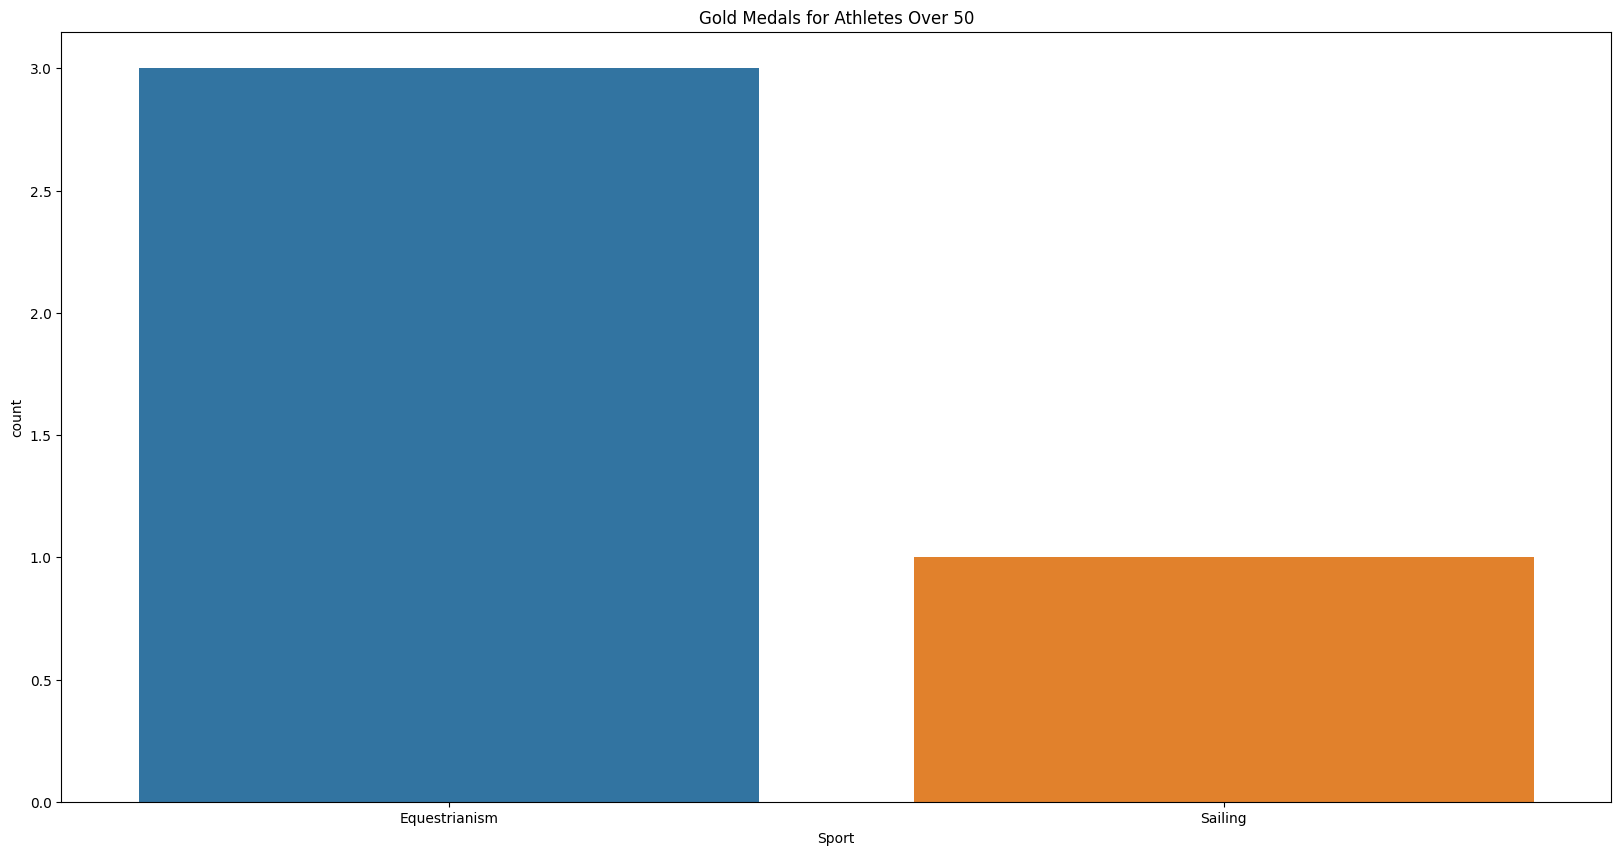

In [ ]:
print(masterDisciplines.value_counts())
plt.figure(figsize=(20, 10))
plt.tight_layout()
sns.countplot(x='Sport',data=masterDisciplines.to_frame().reset_index())
plt.title('Gold Medals for Athletes Over 50')

# 6. Women in Athletics

In [ ]:
womenInOlympics = merged[(merged.Sex == 'F') & (merged.Season == 'Summer')]

In [ ]:
womenInOlympics.head(10)

ID                                Name Sex   Age  Height  Weight  \
26    8  Cornelia "Cor" Aalten (-Strannood)   F  18.0   168.0     NaN   
27    8  Cornelia "Cor" Aalten (-Strannood)   F  18.0   168.0     NaN   
32   13                  Minna Maarit Aalto   F  30.0   159.0    55.5   
33   13                  Minna Maarit Aalto   F  34.0   159.0    55.5   
79   21           Ragnhild Margrethe Aamodt   F  27.0   163.0     NaN   
80   22                       Andreea Aanei   F  22.0   170.0   125.0   
91   29                Willemien Aardenburg   F  22.0     NaN     NaN   
105  37                  Ann Kristin Aarnes   F  23.0   182.0    64.0   
135  49                        Moonika Aava   F  24.0   168.0    65.0   
136  49                        Moonika Aava   F  28.0   168.0    65.0   

            Team  NOC        Games  Year  Season            City  \
26   Netherlands  NED  1932 Summer  1932  Summer     Los Angeles   
27   Netherlands  NED  1932 Summer  1932  Summer     Los Angeles   
32       Finland  FIN  1996 Summer  1996  Summer         Atlanta   
33       Finland  FIN  2000 Summer  2000  Summer          Sydney   
79        Norway  NOR  2008 Summer  2008  Summer         Beijing   
80       Romania  ROU  2016 Summer  2016  Summer  Rio de Janeiro   
91   Netherlands  NED  1988 Summer  1988  Summer           Seoul   
105       Norway  NOR  1996 Summer  1996  Summer         Atlanta   
135      Estonia  EST  2004 Summer  2004  Summer          Athina   
136      Estonia  EST  2008 Summer  2008  Summer         Beijing   

             Sport                                    Event   Medal  \
26       Athletics             Athletics Women's 100 metres     NaN   
27       Athletics   Athletics Women's 4 x 100 metres Relay     NaN   
32         Sailing               Sailing Women's Windsurfer     NaN   
33         Sailing               Sailing Women's Windsurfer     NaN   
79        Handball                Handball Women's Handball    Gold   
80   Weightlifting  Weightlifting Women's Super-Heavyweight     NaN   
91          Hockey                    Hockey Women's Hockey  Bronze   
105       Football                Football Women's Football  Bronze   
135      Athletics          Athletics Women's Javelin Throw     NaN   
136      Athletics          Athletics Women's Javelin Throw     NaN   

          region notes  
26   Netherlands   NaN  
27   Netherlands   NaN  
32       Finland   NaN  
33       Finland   NaN  
79        Norway   NaN  
80       Romania   NaN  
91   Netherlands   NaN  
105       Norway   NaN  
135      Estonia   NaN  
136      Estonia   NaN

Text(0.5, 1.0, 'Women per edition of the Games')

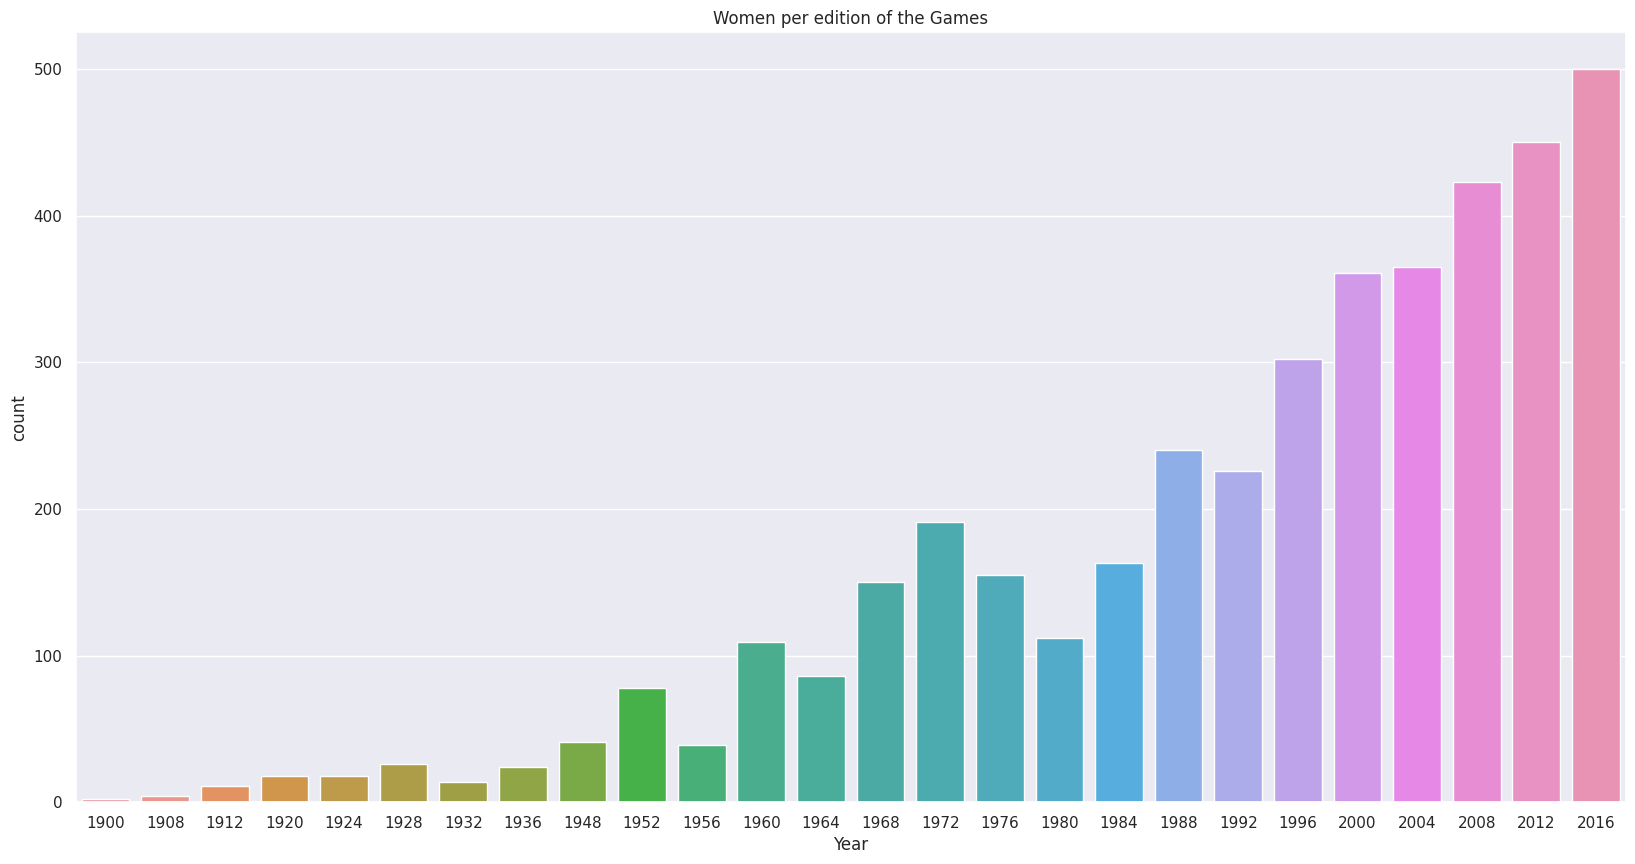

In [ ]:
sns.set(style="darkgrid")
plt.figure(figsize=(20, 10))
sns.countplot(x='Year', data=womenInOlympics)
plt.title('Women per edition of the Games')

In [ ]:
womenInOlympics.loc[womenInOlympics['Year'] == 1900].head(10)

ID                                 Name Sex   Age  Height  Weight  \
283  150        Margaret Ives Abbott (-Dunne)   F  23.0     NaN     NaN   
284  151  Mary Perkins Ives Abbott (Perkins-)   F  42.0     NaN     NaN   

              Team  NOC        Games  Year  Season   City Sport  \
283  United States  USA  1900 Summer  1900  Summer  Paris  Golf   
284  United States  USA  1900 Summer  1900  Summer  Paris  Golf   

                       Event Medal region notes  
283  Golf Women's Individual  Gold    USA   NaN  
284  Golf Women's Individual   NaN    USA   NaN

In [ ]:
womenInOlympics['ID'].loc[womenInOlympics['Year'] == 1900].count()

2

# 7. Medals per country

In [ ]:
goldMedals.region.value_counts().reset_index(name='Medal').head(5)

index  Medal
0      USA    173
1   Russia    115
2  Germany     73
3    Italy     59
4       UK     51

Text(0.5, 1.0, 'Medals per Country')

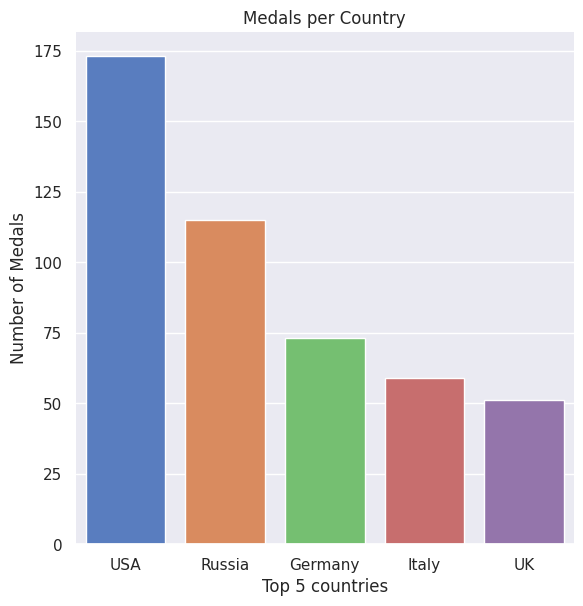

In [ ]:
totalGoldMedals = goldMedals.region.value_counts().reset_index(name='Medal').head(5)
g = sns.catplot(x="index", y="Medal", data=totalGoldMedals,
                height=6, kind="bar", palette="muted")
g.despine(left=True)
g.set_xlabels("Top 5 countries")
g.set_ylabels("Number of Medals")
plt.title('Medals per Country')

# 8. Disciplines with the greatest number of Gold Medals in India

In [ ]:
goldMedalsIND = goldMedals.loc[goldMedals['NOC'] == 'IND']

In [ ]:
goldMedalsIND.Event.value_counts().reset_index(name='Medal').head(20)

index  Medal
0  Hockey Men's Hockey      5

In [ ]:
goldMedalsIND['ID'].count()

5

# 9. What is the median height/weight of an Olympic gold medalist?

In [ ]:
goldMedals.head()

ID                     Name Sex   Age  Height  Weight            Team  \
3    4     Edgar Lindenau Aabye   M  34.0     NaN     NaN  Denmark/Sweden   
42  17  Paavo Johannes Aaltonen   M  28.0   175.0    64.0         Finland   
44  17  Paavo Johannes Aaltonen   M  28.0   175.0    64.0         Finland   
48  17  Paavo Johannes Aaltonen   M  28.0   175.0    64.0         Finland   
60  20       Kjetil Andr Aamodt   M  20.0   176.0    85.0          Norway   

    NOC        Games  Year  Season         City          Sport  \
3   DEN  1900 Summer  1900  Summer        Paris     Tug-Of-War   
42  FIN  1948 Summer  1948  Summer       London     Gymnastics   
44  FIN  1948 Summer  1948  Summer       London     Gymnastics   
48  FIN  1948 Summer  1948  Summer       London     Gymnastics   
60  NOR  1992 Winter  1992  Winter  Albertville  Alpine Skiing   

                               Event Medal   region notes  
3        Tug-Of-War Men's Tug-Of-War  Gold  Denmark   NaN  
42  Gymnastics Men's Team All-Around  Gold  Finland   NaN  
44      Gymnastics Men's Horse Vault  Gold  Finland   NaN  
48  Gymnastics Men's Pommelled Horse  Gold  Finland   NaN  
60       Alpine Skiing Men's Super G  Gold   Norway   NaN

In [ ]:
notNullMedals = goldMedals[(goldMedals['Height'].notnull()) & (goldMedals['Weight'].notnull())]

In [ ]:
notNullMedals.head()

ID                     Name Sex   Age  Height  Weight     Team  NOC  \
42  17  Paavo Johannes Aaltonen   M  28.0   175.0    64.0  Finland  FIN   
44  17  Paavo Johannes Aaltonen   M  28.0   175.0    64.0  Finland  FIN   
48  17  Paavo Johannes Aaltonen   M  28.0   175.0    64.0  Finland  FIN   
60  20       Kjetil Andr Aamodt   M  20.0   176.0    85.0   Norway  NOR   
73  20       Kjetil Andr Aamodt   M  30.0   176.0    85.0   Norway  NOR   

          Games  Year  Season            City          Sport  \
42  1948 Summer  1948  Summer          London     Gymnastics   
44  1948 Summer  1948  Summer          London     Gymnastics   
48  1948 Summer  1948  Summer          London     Gymnastics   
60  1992 Winter  1992  Winter     Albertville  Alpine Skiing   
73  2002 Winter  2002  Winter  Salt Lake City  Alpine Skiing   

                               Event Medal   region notes  
42  Gymnastics Men's Team All-Around  Gold  Finland   NaN  
44      Gymnastics Men's Horse Vault  Gold  Finland   NaN  
48  Gymnastics Men's Pommelled Horse  Gold  Finland   NaN  
60       Alpine Skiing Men's Super G  Gold   Norway   NaN  
73       Alpine Skiing Men's Super G  Gold   Norway   NaN

In [ ]:
notNullMedals.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 698 entries, 42 to 20739
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      698 non-null    int64  
 1   Name    698 non-null    object 
 2   Sex     698 non-null    object 
 3   Age     698 non-null    float64
 4   Height  698 non-null    float64
 5   Weight  698 non-null    float64
 6   Team    698 non-null    object 
 7   NOC     698 non-null    object 
 8   Games   698 non-null    object 
 9   Year    698 non-null    int64  
 10  Season  698 non-null    object 
 11  City    698 non-null    object 
 12  Sport   698 non-null    object 
 13  Event   698 non-null    object 
 14  Medal   698 non-null    object 
 15  region  698 non-null    object 
 16  notes   11 non-null     object 
dtypes: float64(3), int64(2), object(12)
memory usage: 98.2+ KB


In [ ]:
notNullMedals.median()

<ipython-input-31-0e815c27bf7d>:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  notNullMedals.median()


ID        5932.0
Age         25.0
Height     177.5
Weight      73.0
Year      1992.0
dtype: float64

Text(0.5, 1.0, 'Height vs Weight of Olympic Medalists')

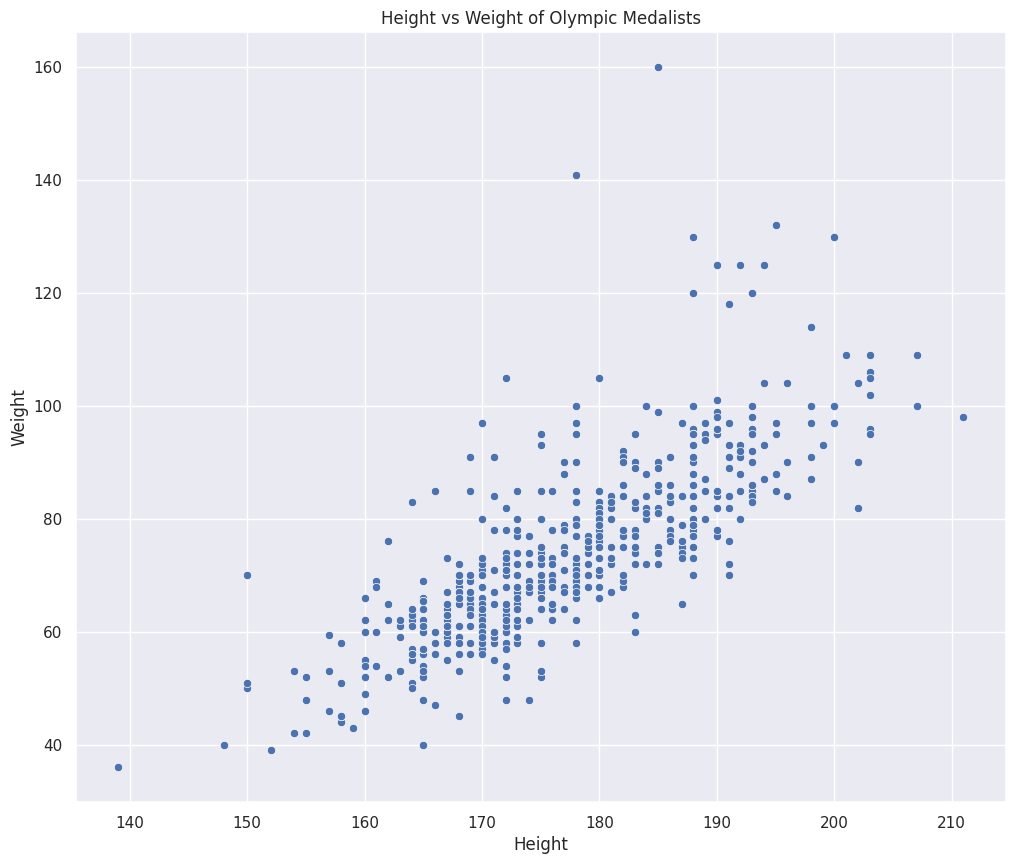

In [ ]:
plt.figure(figsize=(12, 10))
ax = sns.scatterplot(x="Height", y="Weight", data=notNullMedals)
plt.title('Height vs Weight of Olympic Medalists')

In [ ]:
notNullMedals.loc[notNullMedals['Weight'] > 160]

Empty DataFrame
Columns: [ID, Name, Sex, Age, Height, Weight, Team, NOC, Games, Year, Season, City, Sport, Event, Medal, region, notes]
Index: []

# 10. Evolution of the Olympics over time

We will now create two dataframes dividing the population of our dataset using Sex and Season (we would like to review only the summer games)

In [ ]:
MenOverTime = merged[(merged.Sex == 'M') & (merged.Season == 'Summer')]
WomenOverTime = merged[(merged.Sex == 'F') & (merged.Season == 'Summer')]

In [ ]:
MenOverTime.head()

ID                            Name Sex   Age  Height  Weight  \
0    1                       A Dijiang   M  24.0   180.0    80.0   
1    2                        A Lamusi   M  23.0   170.0    60.0   
2    3             Gunnar Nielsen Aaby   M  24.0     NaN     NaN   
3    4            Edgar Lindenau Aabye   M  34.0     NaN     NaN   
29  10  Einar Ferdinand "Einari" Aalto   M  26.0     NaN     NaN   

              Team  NOC        Games  Year  Season       City       Sport  \
0            China  CHN  1992 Summer  1992  Summer  Barcelona  Basketball   
1            China  CHN  2012 Summer  2012  Summer     London        Judo   
2          Denmark  DEN  1920 Summer  1920  Summer  Antwerpen    Football   
3   Denmark/Sweden  DEN  1900 Summer  1900  Summer      Paris  Tug-Of-War   
29         Finland  FIN  1952 Summer  1952  Summer   Helsinki    Swimming   

                                  Event Medal   region notes  
0           Basketball Men's Basketball   NaN    China   NaN  
1          Judo Men's Extra-Lightweight   NaN    China   NaN  
2               Football Men's Football   NaN  Denmark   NaN  
3           Tug-Of-War Men's Tug-Of-War  Gold  Denmark   NaN  
29  Swimming Men's 400 metres Freestyle   NaN  Finland   NaN

Text(0.5, 1.0, 'Variation of Male Athletes over time')

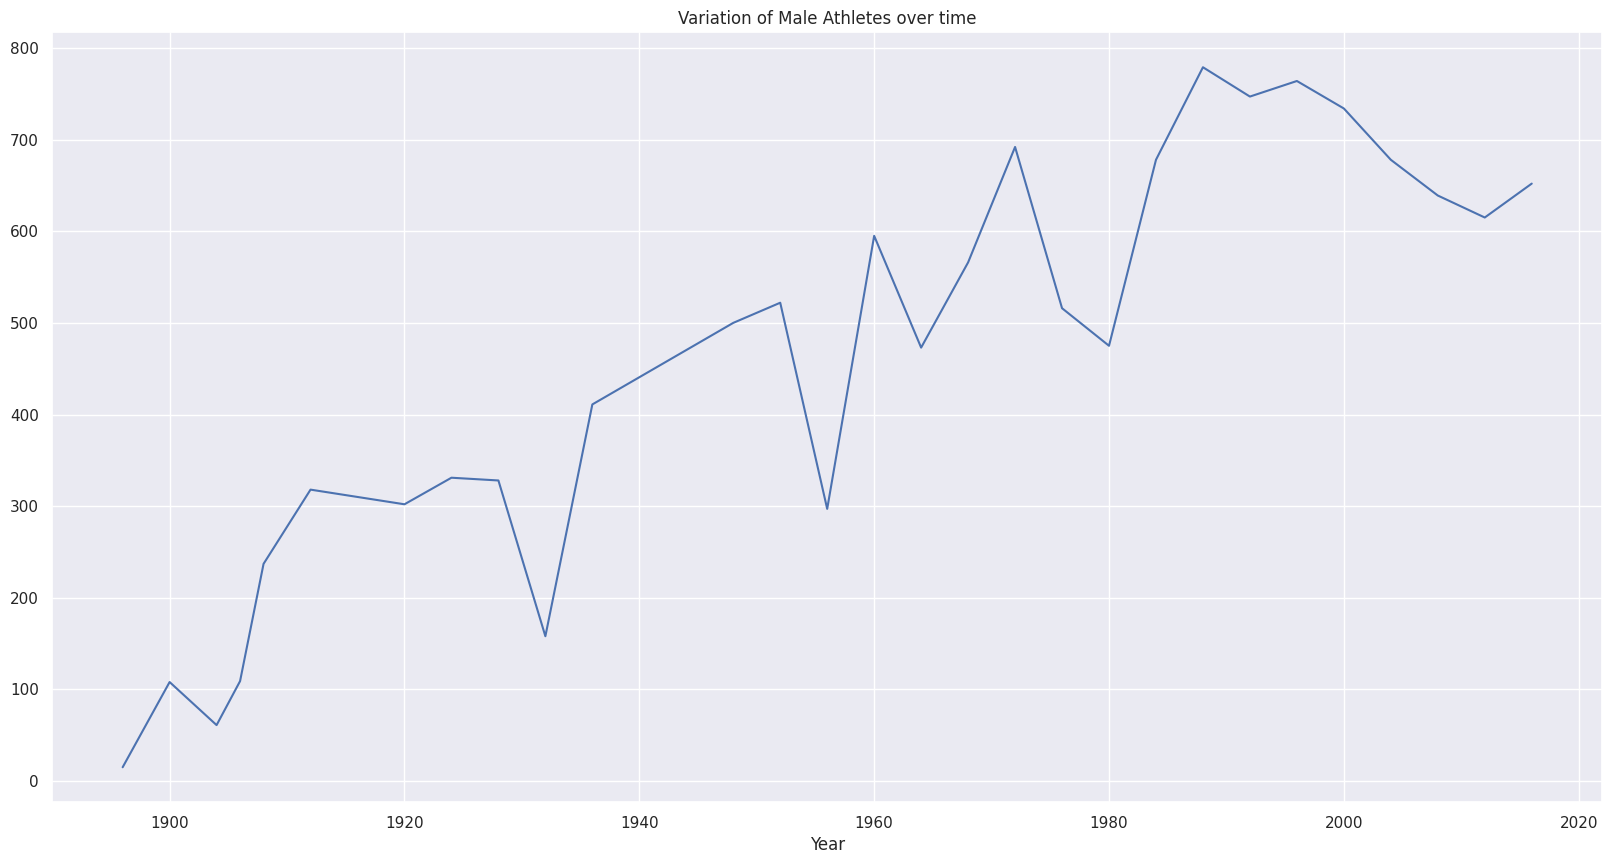

In [ ]:
part = MenOverTime.groupby('Year')['Sex'].value_counts()
plt.figure(figsize=(20, 10))
part.loc[:,'M'].plot()
plt.title('Variation of Male Athletes over time')

Text(0.5, 1.0, 'Variation of Female Athletes over time')

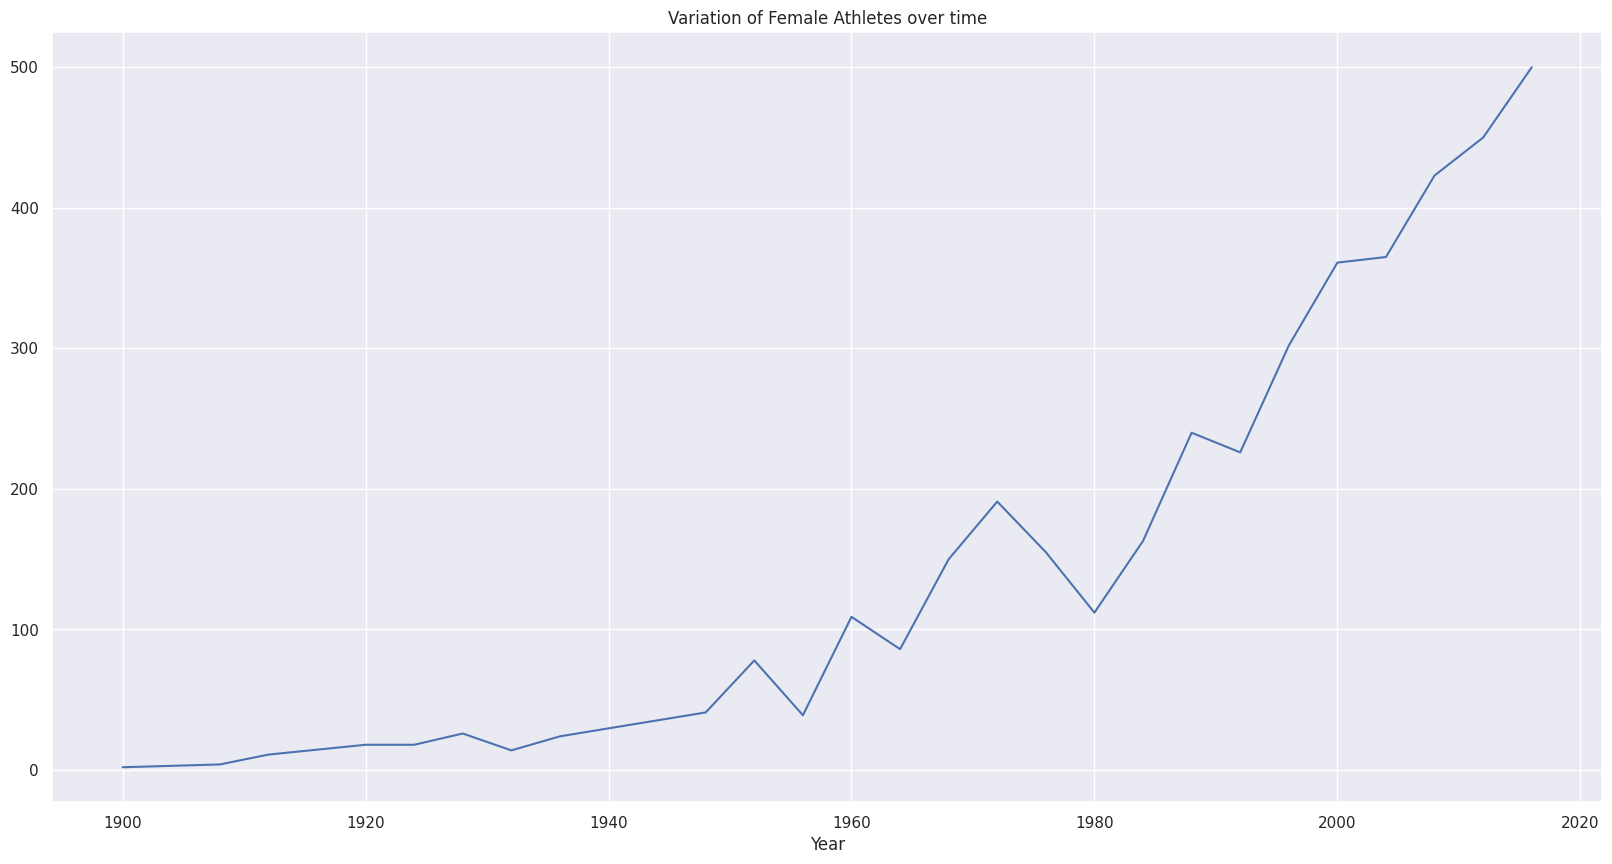

In [ ]:
part = WomenOverTime.groupby('Year')['Sex'].value_counts()
plt.figure(figsize=(20, 10))
part.loc[:,'F'].plot()
plt.title('Variation of Female Athletes over time')

Text(0.5, 1.0, 'Variation of Age for Male Athletes over time')

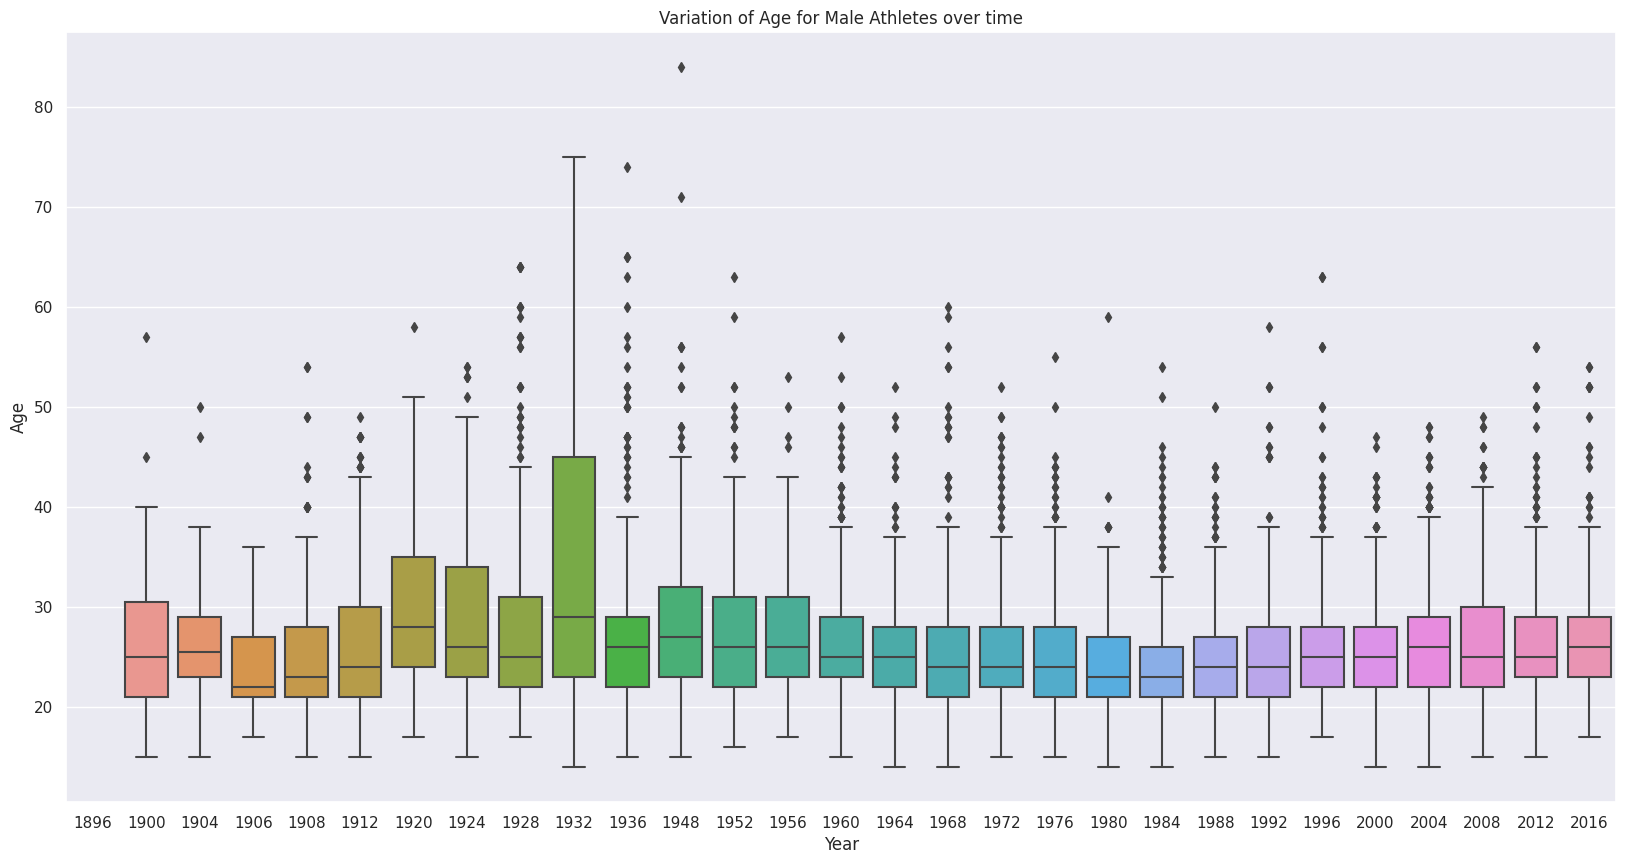

In [ ]:
plt.figure(figsize=(20, 10))
sns.boxplot(x='Year', y='Age', data=MenOverTime)
plt.title('Variation of Age for Male Athletes over time')

In [ ]:
MenOverTime.loc[MenOverTime['Age'] > 80].head(10)

ID                   Name Sex   Age  Height  Weight           Team  \
9371  5146  George Denholm Armour   M  84.0     NaN     NaN  Great Britain   

      NOC        Games  Year  Season    City             Sport  \
9371  GBR  1948 Summer  1948  Summer  London  Art Competitions   

                                               Event Medal region notes  
9371  Art Competitions Mixed Painting, Unknown Event   NaN     UK   NaN

Text(0.5, 1.0, 'Variation of Age for Female Athletes over time')

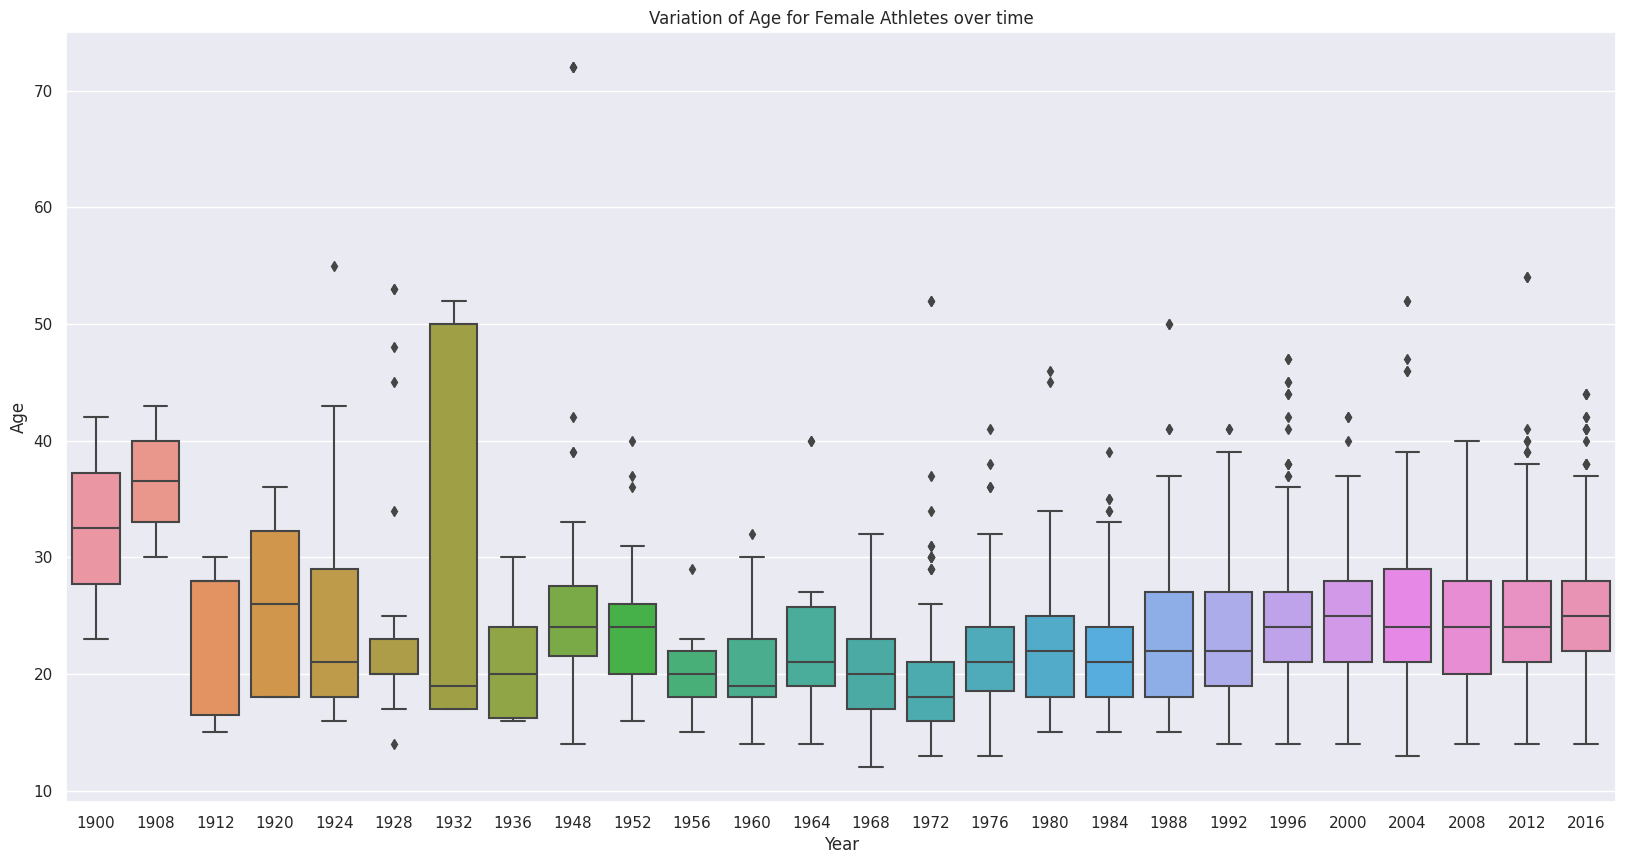

In [ ]:
plt.figure(figsize=(20, 10))
sns.boxplot(x='Year', y='Age', data=WomenOverTime)
plt.title('Variation of Age for Female Athletes over time')

In [ ]:
WomenOverTime.loc[WomenOverTime['Year'] == 1904]

Empty DataFrame
Columns: [ID, Name, Sex, Age, Height, Weight, Team, NOC, Games, Year, Season, City, Sport, Event, Medal, region, notes]
Index: []

/usr/local/lib/python3.10/dist-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1559: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a,
/usr/local/lib/python3.10/dist-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1559: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a,
/usr/local/lib/python3.10/dist-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/usr/local/lib/python3.10/dist-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))


Text(0.5, 1.0, 'Variation of Weight for Male Athletes over time')

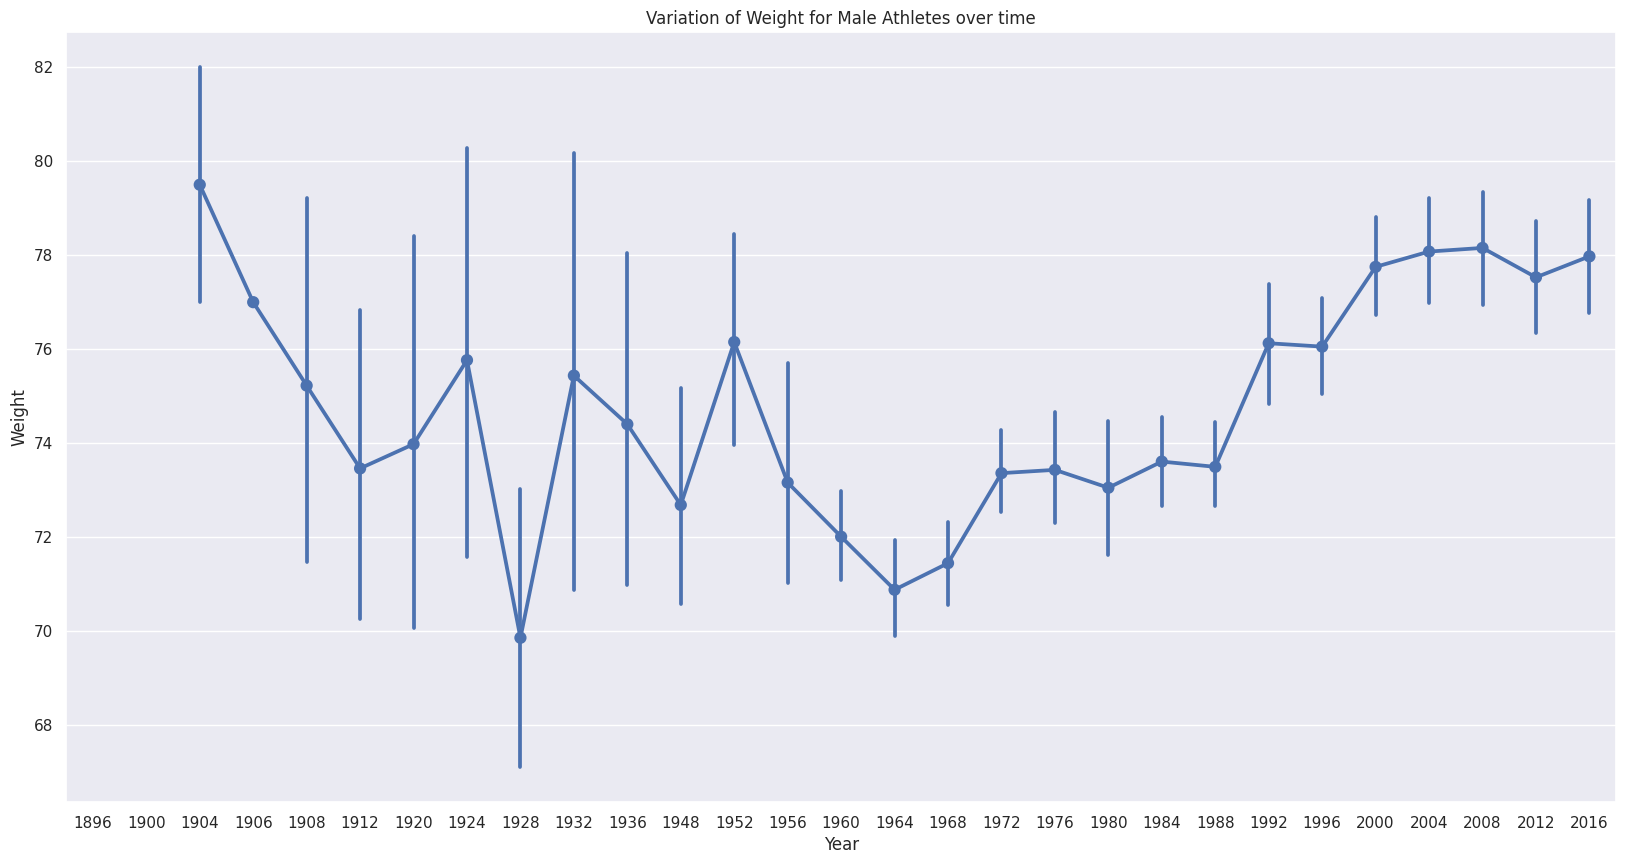

In [ ]:
plt.figure(figsize=(20, 10))
sns.pointplot(x='Year', y='Weight', data=MenOverTime)
plt.title('Variation of Weight for Male Athletes over time')

Text(0.5, 1.0, 'Variation of Weight for Female Athletes over time')

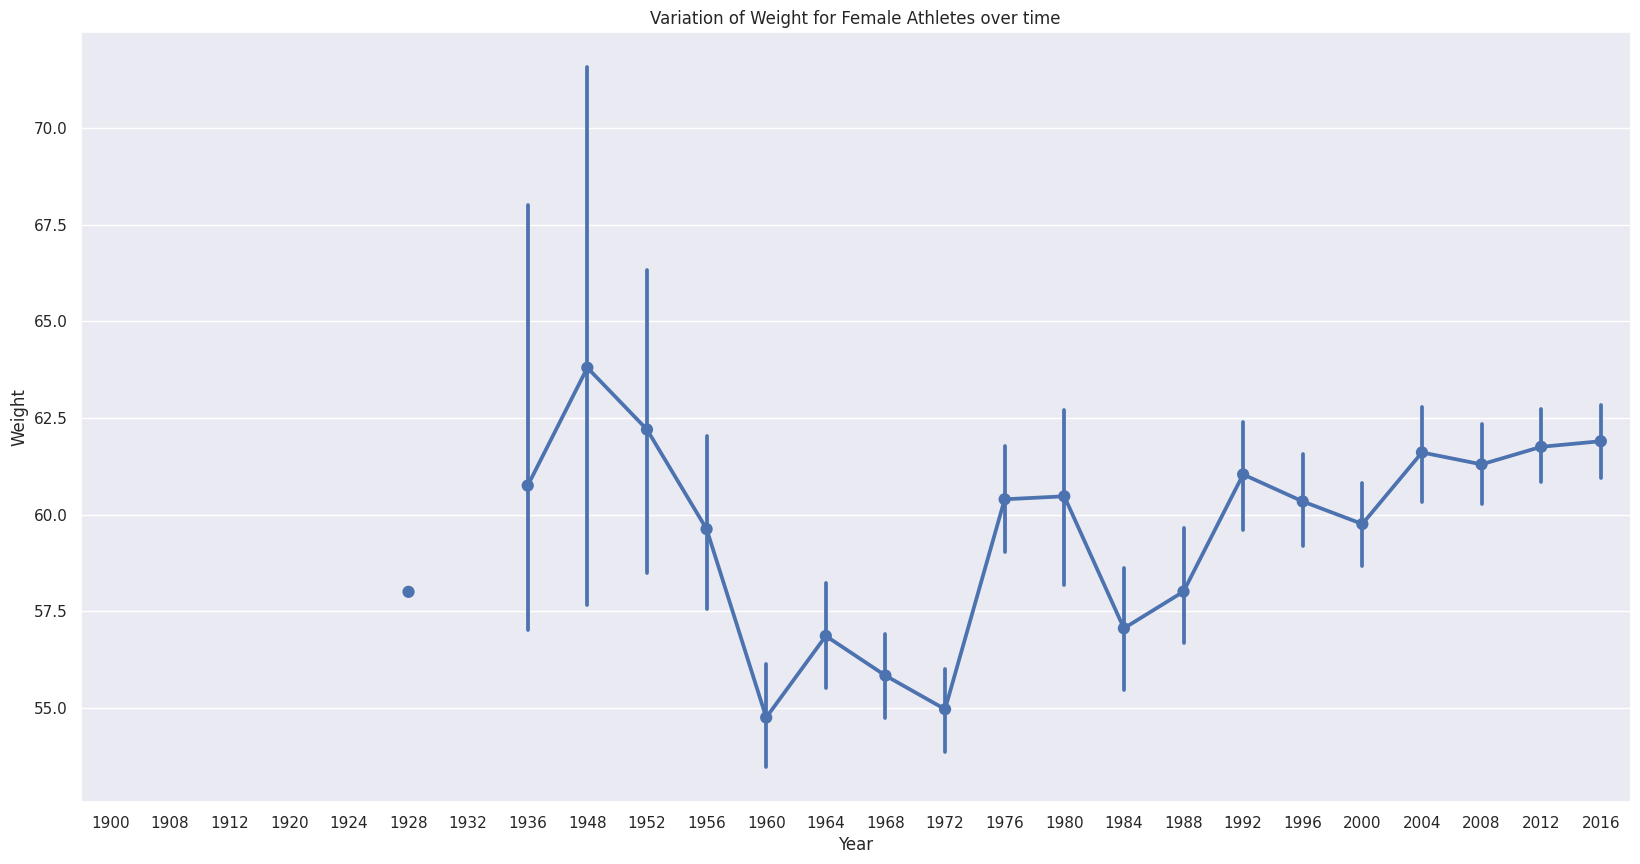

In [ ]:
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(20, 10))
sns.pointplot(x='Year', y='Weight', data=WomenOverTime)
plt.title('Variation of Weight for Female Athletes over time')

In [ ]:
womenInOlympics.loc[womenInOlympics['Year'] < 1924].head(20)

ID                                               Name Sex   Age  \
283    150                      Margaret Ives Abbott (-Dunne)   F  23.0   
284    151                Mary Perkins Ives Abbott (Perkins-)   F  42.0   
1738   968                            Margarete "Grete" Adler   F  16.0   
1739   968                            Margarete "Grete" Adler   F  16.0   
1756   975  Anna Mrtha Vilhelmina Adlerstrhle (von Oelreich-)   F  39.0   
1768   978                   Mrta Elvira Adlerz (-Hermansson)   F  15.0   
1769   978                   Mrta Elvira Adlerz (-Hermansson)   F  23.0   
2749  1531                   Frances Helen Aitchison (-Leisk)   F  30.0   
2750  1531                   Frances Helen Aitchison (-Leisk)   F  30.0   
4963  2830                      Mary Aileen Allen (Conquest-)   F  31.0   
6958  3907                    Elsa Helena Andersson (-Cordes)   F  17.0   
7129  3985                      Selma Augusta Maria Andersson   F  17.0   
7130  3985                      Selma Augusta Maria Andersson   F  25.0   
8630  4739                       Gertrude Appleyard (Tuppen-)   F  43.0   
9048  4981                           Fernande Arendt (-Jamar)   F   NaN   
9049  4981                           Fernande Arendt (-Jamar)   F   NaN   
9355  5142                  Ethel Isabel Armitage (MacLaren-)   F  34.0   
9400  5160                 Beatrice Eileen Armstrong (-Purdy)   F  26.0   
9502  5213                             Edith Arnheim (Lasch-)   F  28.0   
9503  5213                             Edith Arnheim (Lasch-)   F  28.0   

      Height  Weight             Team  NOC        Games  Year  Season  \
283      NaN     NaN    United States  USA  1900 Summer  1900  Summer   
284      NaN     NaN    United States  USA  1900 Summer  1900  Summer   
1738     NaN     NaN          Austria  AUT  1912 Summer  1912  Summer   
1739     NaN     NaN          Austria  AUT  1912 Summer  1912  Summer   
1756     NaN     NaN           Sweden  SWE  1908 Summer  1908  Summer   
1768     NaN     NaN           Sweden  SWE  1912 Summer  1912  Summer   
1769     NaN     NaN           Sweden  SWE  1920 Summer  1920  Summer   
2749     NaN     NaN  Great Britain-1  GBR  1912 Summer  1912  Summer   
2750     NaN     NaN    Great Britain  GBR  1912 Summer  1912  Summer   
4963   157.0     NaN    United States  USA  1920 Summer  1920  Summer   
6958     NaN     NaN           Sweden  SWE  1912 Summer  1912  Summer   
7129     NaN     NaN           Sweden  SWE  1912 Summer  1912  Summer   
7130     NaN     NaN           Sweden  SWE  1920 Summer  1920  Summer   
8630     NaN     NaN    Great Britain  GBR  1908 Summer  1908  Summer   
9048     NaN     NaN          Belgium  BEL  1920 Summer  1920  Summer   
9049     NaN     NaN          Belgium  BEL  1920 Summer  1920  Summer   
9355     NaN     NaN    Great Britain  GBR  1908 Summer  1908  Summer   
9400     NaN     NaN    Great Britain  GBR  1920 Summer  1920  Summer   
9502     NaN     NaN           Sweden  SWE  1912 Summer  1912  Summer   
9503     NaN     NaN         Sweden-3  SWE  1912 Summer  1912  Summer   

           City     Sport                                            Event  \
283       Paris      Golf                          Golf Women's Individual   
284       Paris      Golf                          Golf Women's Individual   
1738  Stockholm  Swimming            Swimming Women's 100 metres Freestyle   
1739  Stockholm  Swimming  Swimming Women's 4 x 100 metres Freestyle Relay   
1756     London    Tennis           Tennis Women's Singles, Covered Courts   
1768  Stockholm    Diving                        Diving Women's Plain High   
1769  Antwerpen    Diving                        Diving Women's Plain High   
2749  Stockholm    Tennis             Tennis Mixed Doubles, Covered Courts   
2750  Stockholm    Tennis           Tennis Women's Singles, Covered Courts   
4963  Antwerpen    Diving                       Diving Women's Springboard   
6958  Stockholm    Diving               

***10.4 Variation of height along time***

Text(0.5, 1.0, 'Variation of Height for Male Athletes over time')

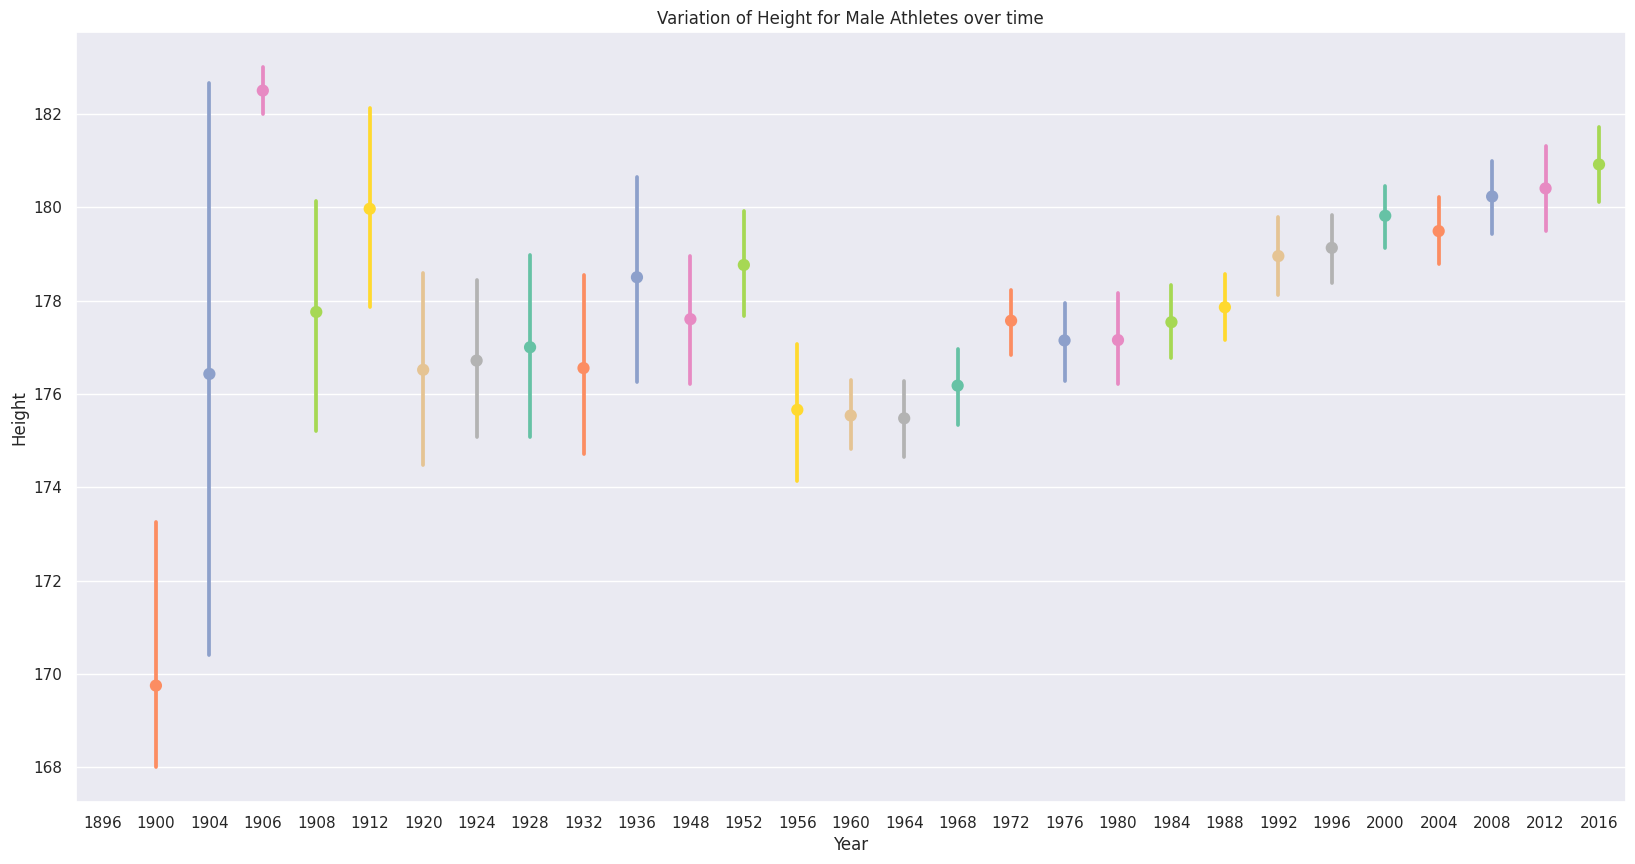

In [ ]:
plt.figure(figsize=(20, 10))
sns.pointplot(x='Year', y='Height', data=MenOverTime, palette='Set2')
plt.title('Variation of Height for Male Athletes over time')

Text(0.5, 1.0, 'Variation of Height for Female Athletes over time')

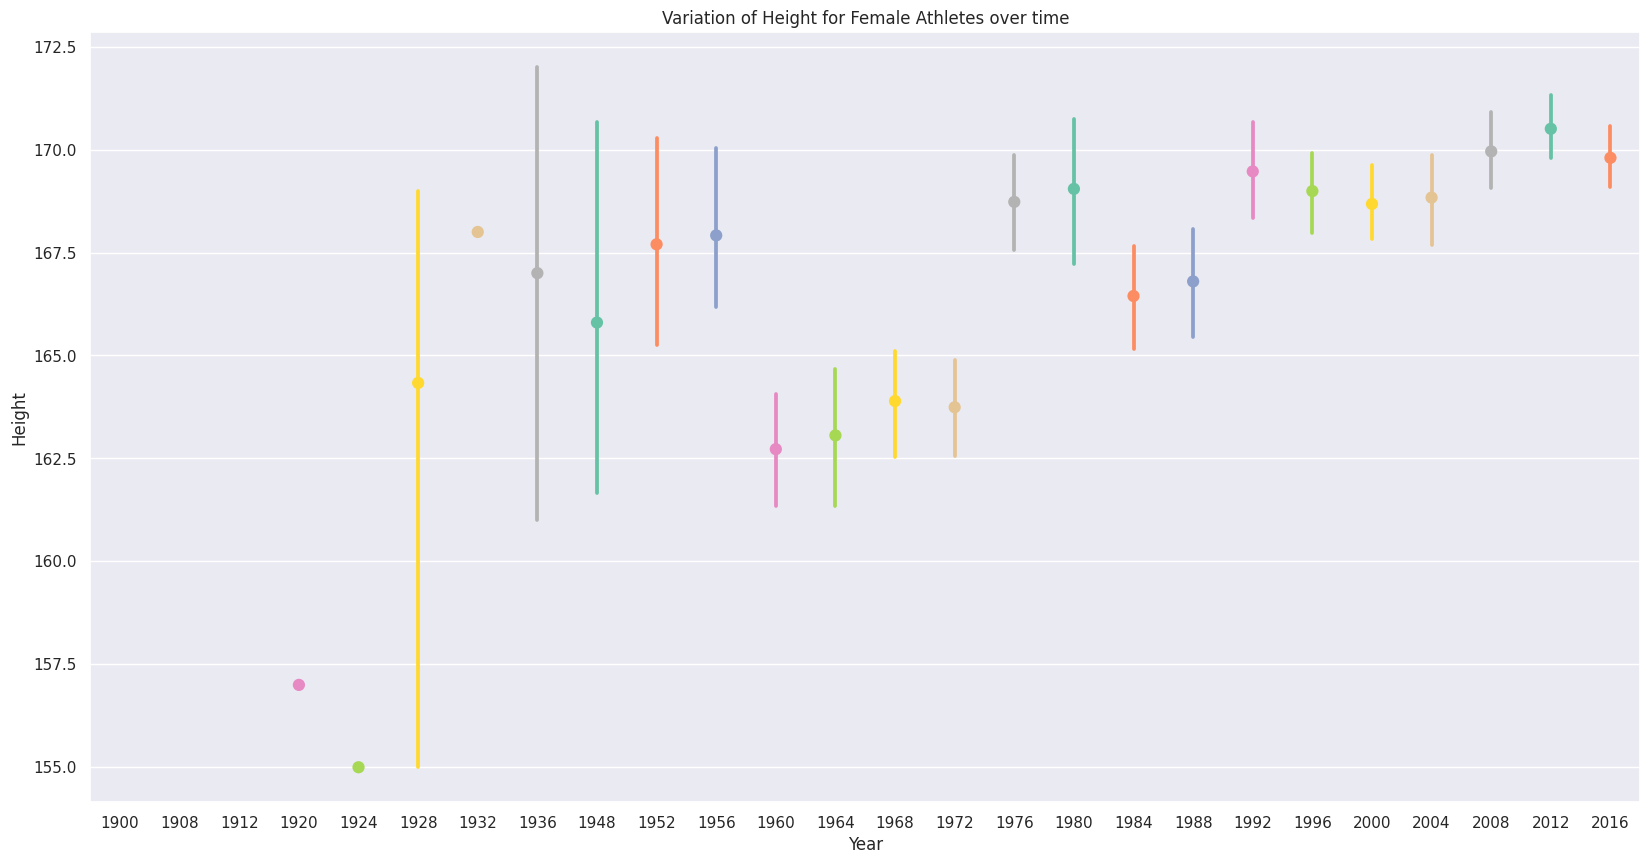

In [ ]:
plt.figure(figsize=(20, 10))
sns.pointplot(x='Year', y='Height', data=WomenOverTime, palette='Set2')
plt.title('Variation of Height for Female Athletes over time')

Female Athletes between the years 1924 and 1952

In [ ]:
WomenOverTime.loc[(WomenOverTime['Year'] > 1924) & (WomenOverTime['Year'] < 1952)].head(10)

ID                                               Name Sex   Age  \
26      8                 Cornelia "Cor" Aalten (-Strannood)   F  18.0   
27      8                 Cornelia "Cor" Aalten (-Strannood)   F  18.0   
731   419                                        Majken berg   F  30.0   
1301  733                             Ilona cs (-Zimmermann)   F  16.0   
1302  733                             Ilona cs (-Zimmermann)   F  16.0   
1484  825                          Lynda Riley Adams (-Hunt)   F  16.0   
1485  825                          Lynda Riley Adams (-Hunt)   F  16.0   
1525  845               Birgitta Ann-Agnes "Bride" Adams-Ray   F  21.0   
1567  874  Edith Addams de Habbelinck (-Lutjens, -Taylor,...   F  20.0   
1568  875                        Jenny Marie Beatrice Addams   F  19.0   

      Height  Weight         Team  NOC        Games  Year  Season  \
26     168.0     NaN  Netherlands  NED  1932 Summer  1932  Summer   
27     168.0     NaN  Netherlands  NED  1932 Summer  1932  Summer   
731    170.0    60.0       Sweden  SWE  1948 Summer  1948  Summer   
1301     NaN     NaN      Hungary  HUN  1936 Summer  1936  Summer   
1302     NaN     NaN      Hungary  HUN  1936 Summer  1936  Summer   
1484     NaN     NaN       Canada  CAN  1936 Summer  1936  Summer   
1485     NaN     NaN       Canada  CAN  1936 Summer  1936  Summer   
1525     NaN     NaN       Sweden  SWE  1928 Summer  1928  Summer   
1567     NaN     NaN      Belgium  BEL  1928 Summer  1928  Summer   
1568     NaN     NaN      Belgium  BEL  1928 Summer  1928  Summer   

             City      Sport                                            Event  \
26    Los Angeles  Athletics                     Athletics Women's 100 metres   
27    Los Angeles  Athletics           Athletics Women's 4 x 100 metres Relay   
731        London  Athletics                   Athletics Women's Discus Throw   
1301       Berlin   Swimming            Swimming Women's 100 metres Freestyle   
1302       Berlin   Swimming  Swimming Women's 4 x 100 metres Freestyle Relay   
1484       Berlin     Diving                       Diving Women's Springboard   
1485       Berlin     Diving                          Diving Women's Platform   
1525    Amsterdam  Athletics                      Athletics Women's High Jump   
1567    Amsterdam    Fencing                 Fencing Women's Foil, Individual   
1568    Amsterdam    Fencing                 Fencing Women's Foil, Individual   

     Medal       region notes  
26     NaN  Netherlands   NaN  
27     NaN  Netherlands   NaN  
731    NaN       Sweden   NaN  
1301   NaN      Hungary   NaN  
1302   NaN      Hungary   NaN  
1484   NaN       Canada   NaN  
1485   NaN       Canada   NaN  
1525   NaN       Sweden   NaN  
1567   NaN      Belgium   NaN  
1568   NaN      Belgium   NaN

In [ ]:
MenOverTime.head(5)

ID                            Name Sex   Age  Height  Weight  \
0    1                       A Dijiang   M  24.0   180.0    80.0   
1    2                        A Lamusi   M  23.0   170.0    60.0   
2    3             Gunnar Nielsen Aaby   M  24.0     NaN     NaN   
3    4            Edgar Lindenau Aabye   M  34.0     NaN     NaN   
29  10  Einar Ferdinand "Einari" Aalto   M  26.0     NaN     NaN   

              Team  NOC        Games  Year  Season       City       Sport  \
0            China  CHN  1992 Summer  1992  Summer  Barcelona  Basketball   
1            China  CHN  2012 Summer  2012  Summer     London        Judo   
2          Denmark  DEN  1920 Summer  1920  Summer  Antwerpen    Football   
3   Denmark/Sweden  DEN  1900 Summer  1900  Summer      Paris  Tug-Of-War   
29         Finland  FIN  1952 Summer  1952  Summer   Helsinki    Swimming   

                                  Event Medal   region notes  
0           Basketball Men's Basketball   NaN    China   NaN  
1          Judo Men's Extra-Lightweight   NaN    China   NaN  
2               Football Men's Football   NaN  Denmark   NaN  
3           Tug-Of-War Men's Tug-Of-War  Gold  Denmark   NaN  
29  Swimming Men's 400 metres Freestyle   NaN  Finland   NaN

Male Indian Athletes

In [ ]:
inMenOverTime = MenOverTime.loc[MenOverTime['region'] == 'India']

In [ ]:
inMenOverTime.head(5)

ID                   Name Sex   Age  Height  Weight   Team  NOC  \
505   281         S. Abdul Hamid   M   NaN     NaN     NaN  India  IND   
506   281         S. Abdul Hamid   M   NaN     NaN     NaN  India  IND   
1183  663  Sharath Kamal Achanta   M  22.0   186.0    85.0  India  IND   
1184  663  Sharath Kamal Achanta   M  26.0   186.0    85.0  India  IND   
1185  663  Sharath Kamal Achanta   M  34.0   186.0    85.0  India  IND   

            Games  Year  Season            City         Sport  \
505   1928 Summer  1928  Summer       Amsterdam     Athletics   
506   1928 Summer  1928  Summer       Amsterdam     Athletics   
1183  2004 Summer  2004  Summer          Athina  Table Tennis   
1184  2008 Summer  2008  Summer         Beijing  Table Tennis   
1185  2016 Summer  2016  Summer  Rio de Janeiro  Table Tennis   

                                   Event Medal region notes  
505   Athletics Men's 110 metres Hurdles   NaN  India   NaN  
506   Athletics Men's 400 metres Hurdles   NaN  India   NaN  
1183          Table Tennis Men's Singles   NaN  India   NaN  
1184          Table Tennis Men's Singles   NaN  India   NaN  
1185          Table Tennis Men's Singles   NaN  India   NaN

Text(0.5, 1.0, 'Variation of Age for Indian Male Athletes over time')

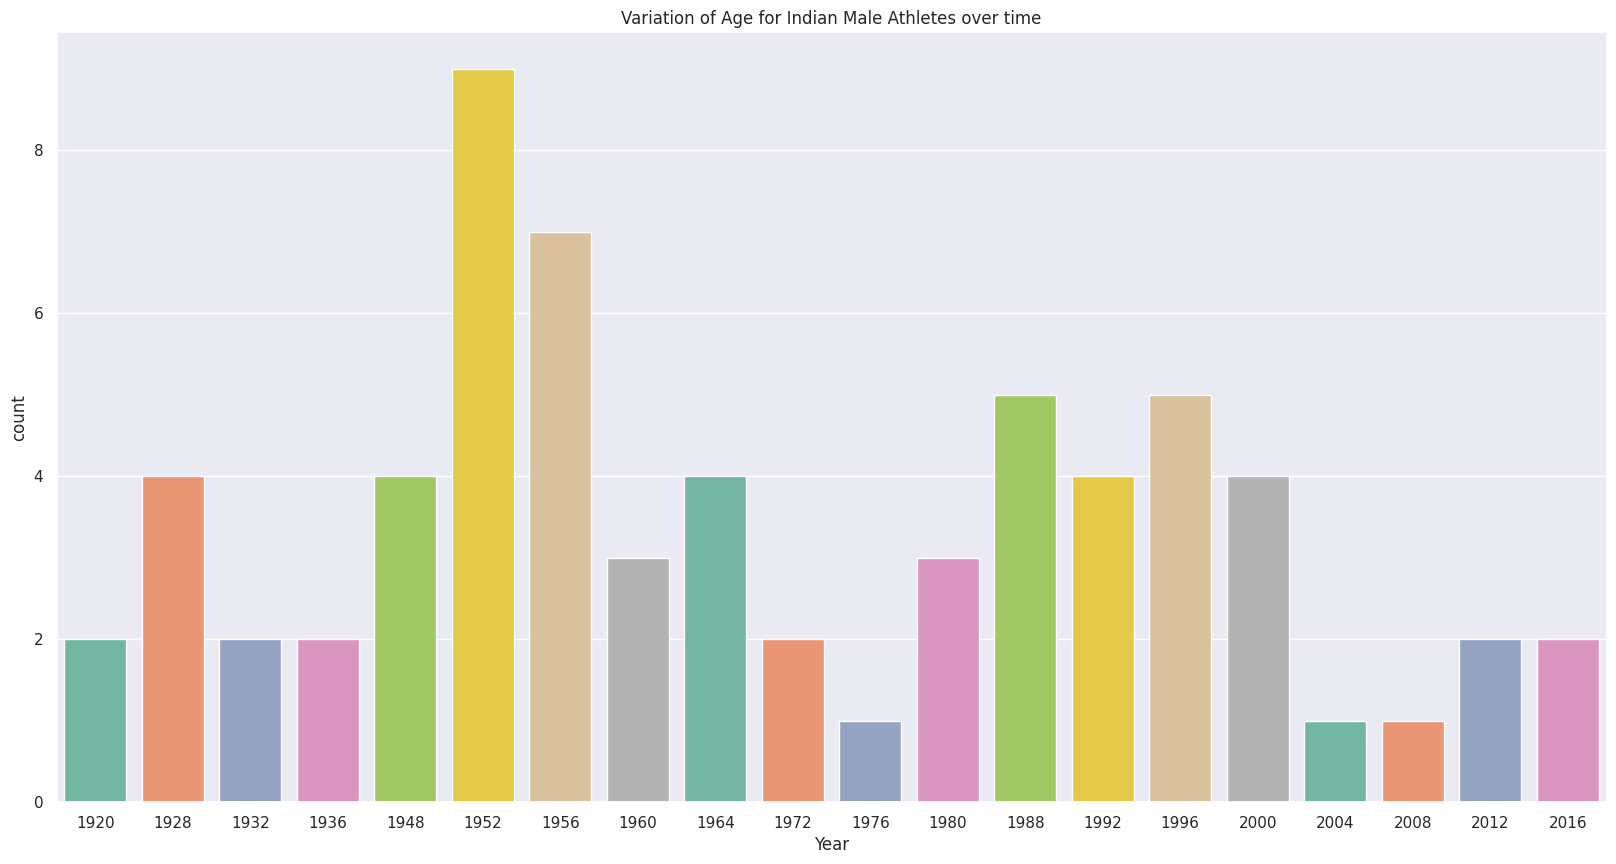

In [ ]:
sns.set(style="darkgrid")
plt.figure(figsize=(20, 10))
sns.countplot(x='Year', data=inMenOverTime, palette='Set2')
plt.title('Variation of Age for Indian Male Athletes over time')

In [ ]:
inWomenOverTime = WomenOverTime.loc[WomenOverTime['region'] == 'India']

Text(0.5, 1.0, 'Variation of Age for Indian Female Athletes over time')

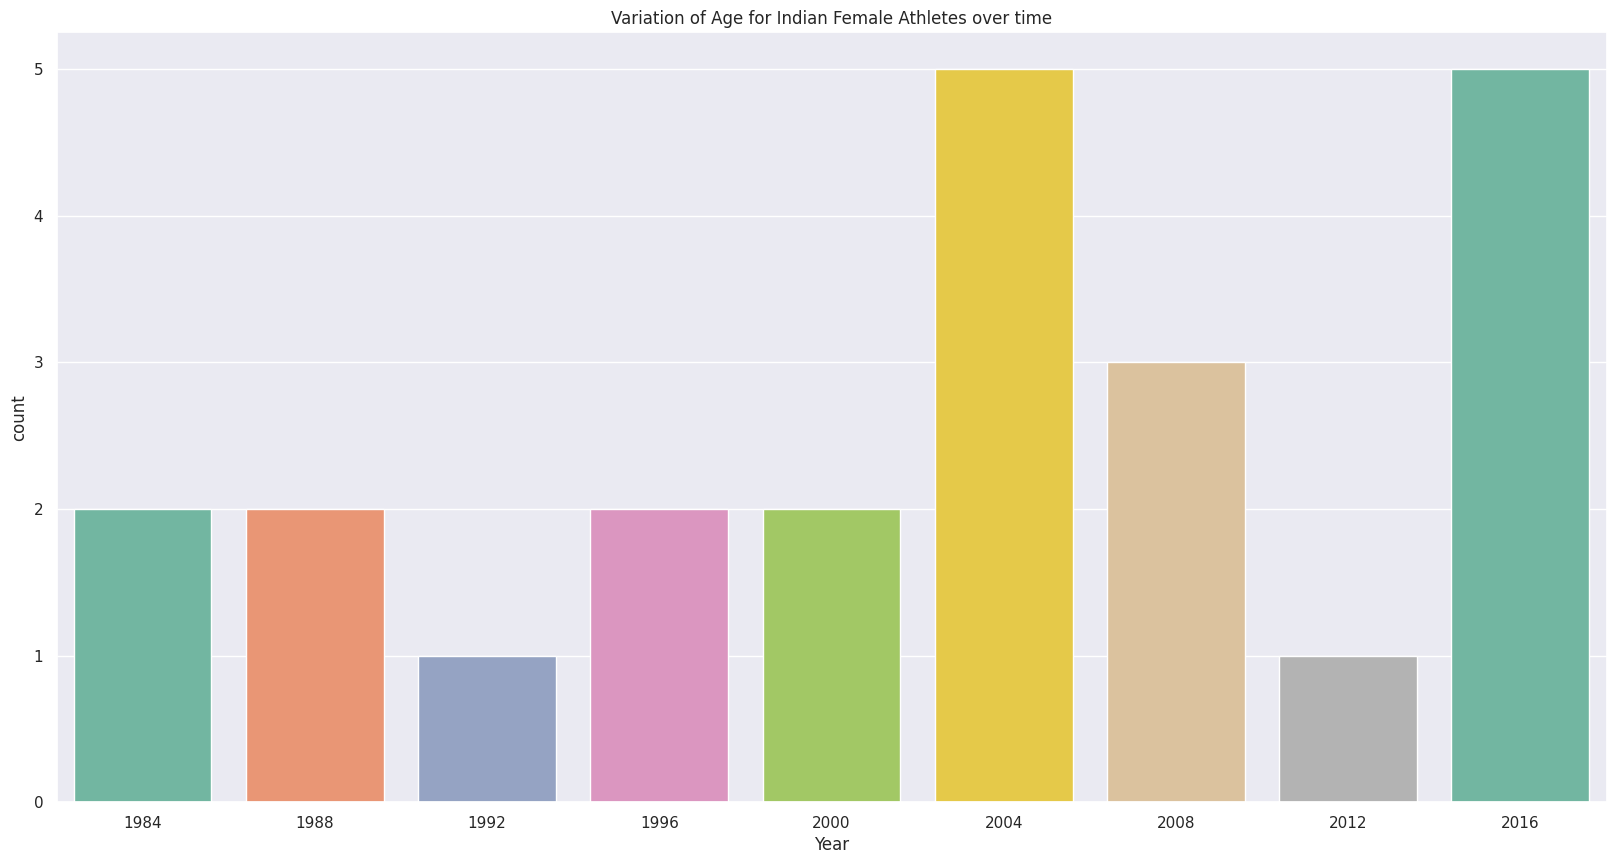

In [ ]:
sns.set(style="darkgrid")
plt.figure(figsize=(20, 10))
sns.countplot(x='Year', data=inWomenOverTime, palette='Set2')
plt.title('Variation of Age for Indian Female Athletes over time')

In [ ]:
!pip install pygwalker
import pygwalker as pyg
pyg.walk(merged[(merged.Year > 2000)])

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 37.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 46.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 333.0/333.0 kB 38.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 63.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 66.0 MB/s eta 0:00:00
  Attempting uninstall: duckdb
    Found existing installation: duckdb 0.9.2
    Uninstalling duckdb-0.9.2:
      Successfully uninstalled duckdb-0.9.2
  Attempting uninstall: sqlglot
    Found existing installation: sqlglot 17.16.2
    Uninstalling sqlglot-17.16.2:
      Successfully uninstalled sqlglot-17.16.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is th

Box(children=(HTML(value='<div id="ifr-pyg-0" style="height: auto">\n    <head>\n        <meta http-equiv="Con…

# 11. Model Building

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')


In [ ]:
data = merged[['Sex','Age','Height','Weight','Medal','Sport']]
data['Medal'] = data['Medal'].apply(lambda x: 1 if str(x) != 'nan' else 0)


def binary_encoder(data, columns, positive_values):
    df = data.copy()
    for col, positive_value in zip(columns, positive_values):
        df[col] = df[col].apply(lambda x: 1 if x == positive_value else 0)
    return df


data = binary_encoder(
    data,
    columns=['Sex'],
    positive_values=['M']
)


In [ ]:
def onehot_encoder(data, cols):
    df = data.copy()
    for col in cols:
        dummies = pd.get_dummies(df[col],drop_first=True)
        df = pd.concat([df, dummies], axis=1)

        df.drop(col, axis=1,inplace=True)
    return df
data = onehot_encoder(data,['Sport'])

In [ ]:
def fill_missing_values(data,missing_values_columns):
    df = data.copy()
    for col in missing_values_columns:
        df[col] = df.groupby(['Medal', 'Sex'],group_keys=False)[col].apply(lambda x: x.fillna(x.mean()).astype(int))

    return df

data = fill_missing_values(data,['Age','Height','Weight'])
print("Total missing values:", data.isna().sum().sum())


Total missing values: 0


In [ ]:

X = data.drop('Medal', axis=1)
y = data['Medal']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=2023)


In [ ]:
sc = StandardScaler()
numerical_columns = ['Age', 'Height', 'Weight']
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()
X_train_scaled[numerical_columns] = sc.fit_transform(
    X_train[numerical_columns])
X_test_scaled[numerical_columns] = sc.transform(
    X_test[numerical_columns])


In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train_scaled,y_train)


RandomForestClassifier()

In [ ]:
mnb = MultinomialNB()
mnb.fit(X_train,y_train)


MultinomialNB()

In [ ]:
y_predRF = rf.predict(X_test_scaled)
y_predNB = mnb.predict(X_test)

In [ ]:
print("Classification Report for Random Forest:\n\n", classification_report(y_test, y_predRF))
print("Classification Report for Multinomial Naive Bayes:\n\n", classification_report(y_test, y_predNB))


Classification Report for Random Forest:

               precision    recall  f1-score   support

           0       0.91      0.96      0.93      3610
           1       0.58      0.34      0.43       542

    accuracy                           0.88      4152
   macro avg       0.74      0.65      0.68      4152
weighted avg       0.86      0.88      0.87      4152

Classification Report for Multinomial Naive Bayes:

               precision    recall  f1-score   support

           0       0.87      1.00      0.93      3610
           1       0.56      0.01      0.02       542

    accuracy                           0.87      4152
   macro avg       0.71      0.50      0.47      4152
weighted avg       0.83      0.87      0.81      4152



In [ ]:
valid_sports = [s for s in X_train.columns if s not in ['Sex', 'Age', 'Height', 'Weight']]

In [ ]:
def predict(Sex, Age, Height, Weight,Sport,Model):
    sex_bin = 0 if Sex == 'female' else 1
    input_data = sc.transform([[Age, Height, Weight]]) if Model == 'Random Forest' else np.array([[Age, Height, Weight]])
    l = [[sex_bin] + input_data[0].tolist()]
    l = pd.DataFrame(l,columns=['Sex', 'Age', 'Height', 'Weight'])
    for s in X_train.columns:
        if s == Sport or s in ['Sex', 'Age', 'Height', 'Weight']:
            if s == Sport:
                l[s] = 1
            continue
        l[s] = 0
    prediction = rf.predict_proba(l)
    print(prediction)
    return 'Wins Medal' if prediction[0][1] > 0.2 else 'Does not win medal'


In [ ]:
from ipywidgets import interact, widgets
sex_widget = widgets.RadioButtons(options=['male', 'female'], description='Sex:')
age_widget = widgets.FloatSlider(min=15, max=45, step=1, description='Age:')
height_widget = widgets.FloatSlider(min=140, max=220, step=1, description='Height:')
weight_widget = widgets.FloatSlider(min=30, max=150, step=1, description='Weight:')
sport_widget = widgets.Dropdown(options=valid_sports, description='Sport:')
model_widget = widgets.Dropdown(options=['Random Forest', 'Multinomial Naive Bayes'], description='Model:')

interact(predict, Sex=sex_widget, Age=age_widget, Height=height_widget, Weight=weight_widget, Sport=sport_widget, Model=model_widget)


interactive(children=(RadioButtons(description='Sex:', options=('male', 'female'), value='male'), FloatSlider(…

<function __main__.predict(Sex, Age, Height, Weight, Sport, Model)>

# 11. Conclusions

In conclusion, the Olympic history dataset has shed light on how to forecast medals depending on a number of variables, including height,weight and age. The study on data visualisation has successfully illustrated how historical data can be used to predict future patterns and results.

According to the data, some sports have consistently had more medal winners throughout time. The project's visualisations have made it simpler to spot these trends and patterns and offer useful information for athletes, sports fans, and policymakers. As a result, data visualisation is a potent tool that can turn complicated data into insightful understandings, enabling strategic planning and data-driven decision-making.